Aluno: Eduardo Fontes Baltazar da Silveira

In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.ndimage import center_of_mass

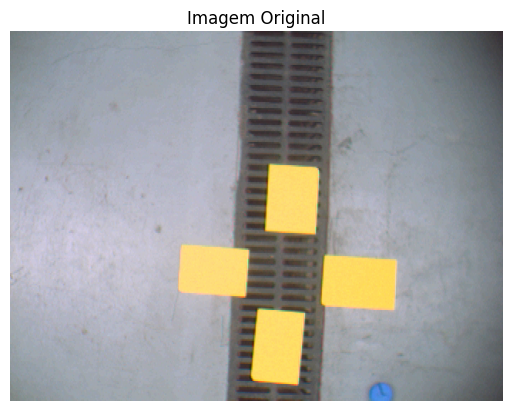

In [2]:
image_path = "yellowtargets.png"

image = cv2.imread(image_path)
# Exibir a imagem original
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis("off")
plt.show()

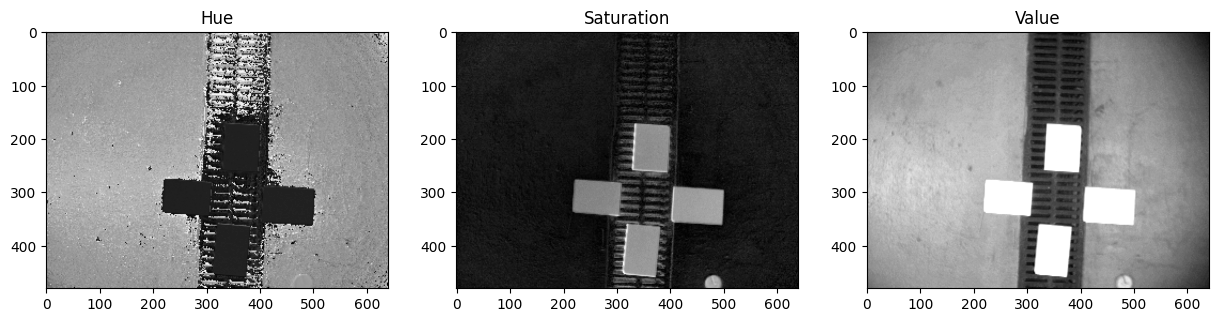

In [3]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(h, cmap='gray')
ax[0].set_title("Hue")
ax[1].imshow(s, cmap='gray')
ax[1].set_title("Saturation")
ax[2].imshow(v, cmap='gray')
ax[2].set_title("Value")
plt.show()


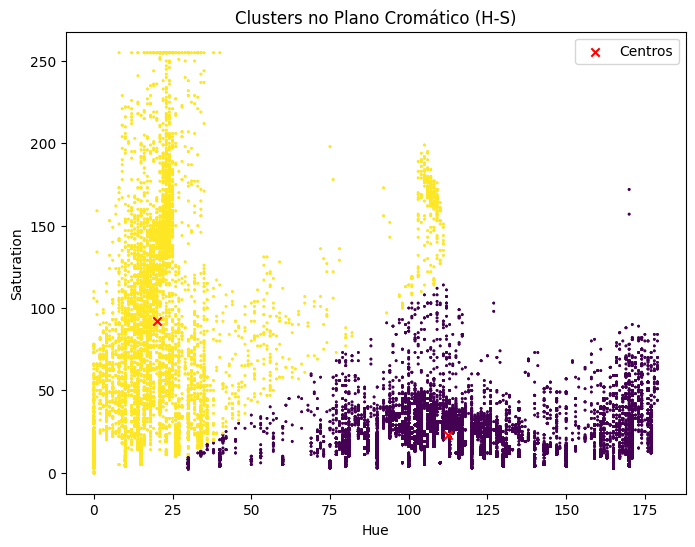

In [7]:
xy_plane = np.vstack((h.flatten(), s.flatten())).T

k_clusters = 2
kmeans = KMeans(n_clusters=k_clusters, random_state=42)
labels = kmeans.fit_predict(xy_plane)
centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(xy_plane[:, 0], xy_plane[:, 1], c=labels, cmap='viridis', s=1)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Centros')
plt.title("Clusters no Plano Cromático (H-S)")
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.legend()
plt.show()


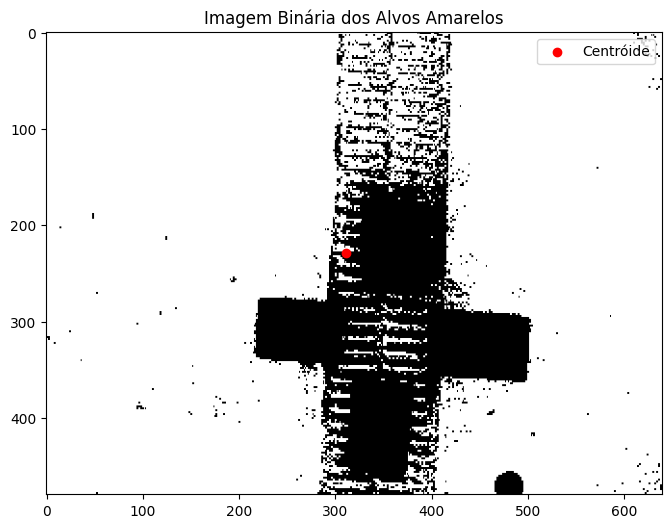

Centróide do alvo amarelo: (229.14648828643456, 311.041191854301)


In [9]:
target_label = np.argmax(np.bincount(labels))
binary_mask = (labels == target_label).reshape(h.shape)

yellow_target = np.where(binary_mask, 1, 0)
centroid = center_of_mass(yellow_target)

plt.figure(figsize=(8, 6))
plt.imshow(binary_mask, cmap='gray')
plt.title("Imagem Binária dos Alvos Amarelos")
plt.scatter([centroid[1]], [centroid[0]], c='red', label='Centróide')
plt.legend()
plt.show()

print(f"Centróide do alvo amarelo: {centroid}")
